In [60]:
# Data processing libraries

import pandas as pd           # data loading & handling
import numpy as np            # numerical operations

#Modeling and preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#ML algorithms

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#Model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report

#Visualization libraries
import matplotlib.pyplot as plt  # plotting
import seaborn as sns          # statistical data visualization


In [27]:
df = pd.read_csv('/Users/jon/Desktop/Ironhack/Unit 6 - Mchine Learning/Machine-Learning-Group-Project/Data/student-mat.csv', sep=";",header=0)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


DAY 2: DATA PREPERATION

In [28]:
# Devide data into features and target variable

features = df.drop(columns=['G3'])
target = df["G3"]

In [29]:
# Get the dummies for feature variables

features = pd.get_dummies(features)

In [30]:
print(features.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')


DAY 3: MODEL DEVELOPMENT AND INITIAL TUNING

In [31]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [32]:
#Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
#Evaluate the model

y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)

RMSE: 5.654548439798476
R2 Score: 0.7242362640829065
Coefficients: [-1.16528434e-01  8.68439642e-02 -1.67168780e-01  8.74763195e-02
 -7.32056758e-03 -2.85612331e-01  3.15271531e-01 -2.02126755e-02
  1.89895479e-01 -1.85462234e-01  5.39529549e-02  4.41838042e-02
  5.55263709e-02  2.11821962e-01  9.57774601e-01  9.35929047e+11
  9.35929047e+11 -3.18201253e+11 -3.18201253e+11 -1.11707247e+11
 -1.11707247e+11 -3.71350575e+10 -3.71350575e+10  8.99969006e+10
  8.99969006e+10 -4.36489404e+11 -4.36489404e+11 -4.36489404e+11
 -4.36489404e+11 -4.36489404e+11  3.28741013e+11  3.28741013e+11
  3.28741013e+11  3.28741013e+11  3.28741013e+11 -4.10817662e+11
 -4.10817662e+11 -4.10817662e+11 -4.10817662e+11 -1.67546139e+12
 -1.67546139e+12 -1.67546139e+12 -2.22055485e+12 -2.22055485e+12
  4.05636454e+11  4.05636454e+11 -1.87008520e+11 -1.87008520e+11
 -7.29185281e+11 -7.29185281e+11 -8.32098303e+10 -8.32098303e+10
  1.92464298e+11  1.92464298e+11 -1.14548088e+11 -1.14548088e+11
 -9.99668954e+11 -9.996

In [34]:
# Logistic Regression Model

# Change the target variable to a binary classification problem
target_binary = (df["G3"] >= 10).astype(int)  # Assuming a pass mark of 10

X_train, X_test, y_train_binary, y_test_binary = train_test_split(features, target_binary, test_size=0.2, random_state=42)

In [35]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train_binary)

LogisticRegression(max_iter=1000)

In [36]:
# Evaluate the logistic regression model
y_pred_binary = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test_binary, y_pred_binary)

# Evaluation
print("Accuracy:", accuracy_score(y_test_binary, y_pred_binary))
print(confusion_matrix(y_test_binary, y_pred_binary))
print(classification_report(y_test_binary, y_pred_binary))

Accuracy: 0.9240506329113924
[[25  2]
 [ 4 48]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.96      0.92      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.92      0.92        79
weighted avg       0.93      0.92      0.92        79



In [37]:
# KNN Classifier

knn_model = KNeighborsClassifier(n_neighbors=5)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# Evaluate the model
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.2911392405063291


ENSAMBLE METHODS

In [39]:
#Baggin and Pasting

bagging_model = BaggingRegressor(DecisionTreeRegressor(max_depth=20), n_estimators=100, random_state=42)

In [40]:
# Fit the model
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 n_estimators=100, random_state=42)

In [41]:
#Evaluate the model
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging RMSE:", mean_squared_error(y_test, y_pred_bagging))
print("Bagging R2 Score:", r2_score(y_test, y_pred_bagging))

Bagging RMSE: 3.722575949367089
Bagging R2 Score: 0.8184556270121589


RANDOM FOREST METHOD

In [42]:
#Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [43]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [44]:
pred = forest.predict(X_test)

In [45]:
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test))
print("R2 score", forest.score(X_test, y_test))

MAE 1.210126582278481
RMSE 4.190131645569619
R2 score 0.7956536461100867


XGBBOOST

In [46]:
# XGBoost Regressor
from xgboost import XGBRegressor


In [47]:
xg_boost = XGBRegressor(n_estimators=100, max_depth=20, random_state=42)
xg_boost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
pred = xg_boost.predict(X_test)
print("XGBoost MAE", mean_absolute_error(pred, y_test))
print("XGBoost RMSE", mean_squared_error(pred, y_test))
print("XGBoost R2 score", xg_boost.score(X_test, y_test))

XGBoost MAE 1.1989313430989845
XGBoost RMSE 4.729623671160518
XGBoost R2 score 0.7693434397234333


LOS MEJORES RESULTADOS LOS VEMOS CON EL MODELO RANDOM FOREST, ASI QUE PROCEDEMOS CON LA OPTIMIZACIÓN DE LOS HIPERPARÁMETROS PARA ESTE MODELO

In [57]:
# Procedemos con un RANDOM SEARCH para encontrar los mejores hiperparámetros

# 1. Inicializamos modelo
rf = RandomForestRegressor(random_state=42)

# 2. Definimos la distribución de hiperparámetros para el random search
random_param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# 3. Run Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_param_dist,
    n_iter=30,               # number of parameter combos to try
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    error_score='raise' 
)

random_search.fit(X_train, y_train)

print("Best parameters from Randomized Search:")
print(random_search.best_params_)

# Step 4: Use best params from Randomized Search to define Grid Search ranges
best_params = random_search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters from Randomized Search:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}


AHORA QUE TENEMOS LOS MEJORES PARÁMETROS GUARDAOS, LOS UTILIZAMOS PARA EL GRID SEARCH

In [58]:
# Ajustamos grid_param según best_params de Randomized Search para RandomForest
grid_param = {
    'n_estimators': [
        max(10, best_params['n_estimators'] - 50), 
        best_params['n_estimators'], 
        best_params['n_estimators'] + 50
    ],
    'max_depth': [
        None if best_params['max_depth'] is None else max(1, best_params['max_depth'] - 2), 
        best_params['max_depth'], 
        None if best_params['max_depth'] is None else best_params['max_depth'] + 2
    ],
    'min_samples_split': [
        max(2, best_params['min_samples_split'] - 1), 
        best_params['min_samples_split'], 
        best_params['min_samples_split'] + 1
    ],
    'min_samples_leaf': [
        max(1, best_params['min_samples_leaf'] - 1), 
        best_params['min_samples_leaf'], 
        best_params['min_samples_leaf'] + 1
    ],
    'max_features': ['sqrt', 'log2', None]  # prueba las opciones válidas
}

# Inicializamos RandomForestRegressor sin parámetros (serán configurados por GridSearch)
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=grid_param,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:")
print(grid_search.best_params_)

# Retrain model with best parameters
best_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate
pred = best_model.predict(X_test)
print("Tuned RF MAE:", mean_absolute_error(y_test, pred))
print("Tuned RF RMSE:", mean_squared_error(y_test, pred, squared=False))
print("Tuned RF R2:", best_model.score(X_test, y_test))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters from Grid Search:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Tuned RF MAE: 1.1989807029819692
Tuned RF RMSE: 2.000011806961805
Tuned RF R2: 0.8049237743423208


VISUALIZACIONES DEL MEJOR METODO

/var/folders/_2/ksgd3nl52j9g0sxwpjjd1bgh0000gn/T/ipykernel_20280/1214488342.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, y='Feature', x='Importance', palette='viridis')


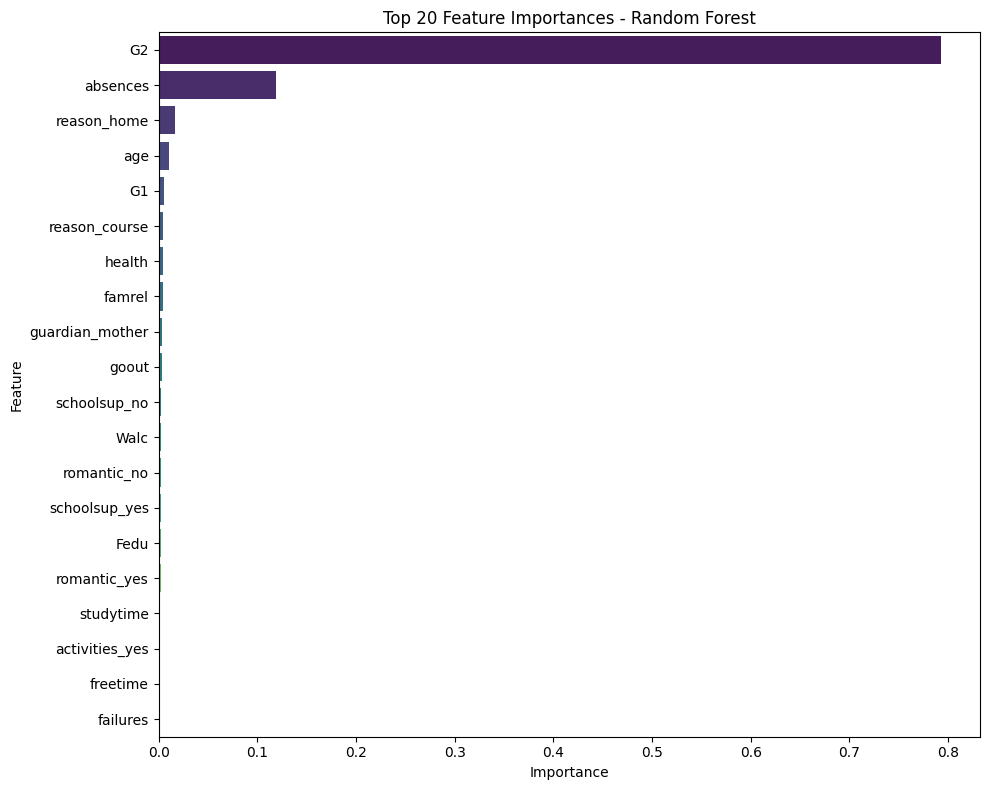

In [63]:
#Plot to visualize feature importances

importances = best_model.feature_importances_
feature_names = X_train.columns  # assuming X_train is a DataFrame

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Get importances
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)  # Top 20 features

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=feat_imp_df, y='Feature', x='Importance', palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('Feature importance with G1 & G2.png', dpi=300, bbox_inches='tight')
plt.show()

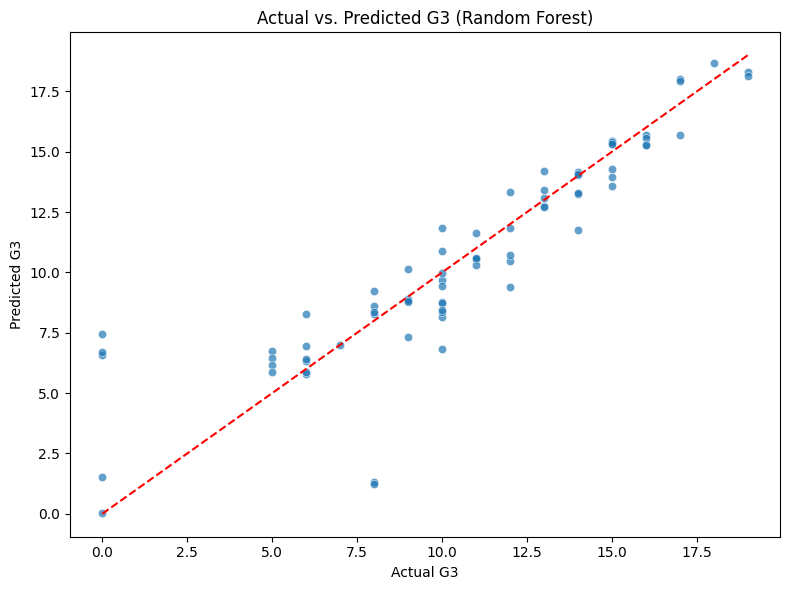

In [64]:
#Plot to see the prediction of G3 vs the actual G3

# Predict using the best model
y_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # reference line
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs. Predicted G3 (Random Forest)')
plt.tight_layout()
plt.savefig('Random Forest actual vs predicted with G1 & G2.png', dpi=300, bbox_inches='tight')
plt.show()